In [1]:
import uproot
import coffea.hist as hist
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

hep.set_style("CMS")

In [3]:
v0_file = "/work/gallim/root_files/vertex_investigation/VertexInvestigation_vtx0/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_*.root"
v_custom_file = "/work/gallim/root_files/vertex_investigation/VertexInvestigation/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_*.root"

tree_name = "diphotonDumper/trees/ggH_125_13TeV_All_$SYST"

#variables = ['candidate_id', 'weight', 'mass', 'pt', 'eta', 'leadPt', 'subleadPt', 'rho', 'nvtx', 'event', 'lumi', 'processIndex', 'run', 'npu', 'puweight']
#variables = ['mass', 'pt']
variables = ['candidate_id', 'weight', 'mass', 'pt', 'eta', 'leadPt', 'subleadPt', 'vtx_z', 'gen_vtx_z', 'rho', 'nvtx', 'event', 'lumi', 'processIndex', 'run', 'nvtx', 'npu', 'puweight']

specs = {
    'mass': {
        'bins': 80,
        'range': [100, 140]
    },
    'pt': {
        'bins': 80,
        'range': [0, 300]
    },
    'eta': {
        'bins': 80,
        'range': [-5, 5]
    },
    'leadPt': {
        'bins': 80,
        'range': [0, 300]
    },
    'subleadPt': {
        'bins': 80,
        'range': [0, 200]  
    },
    'rho': {
        'bins': 80,
        'range': [0, 50]
    }
}
#variables = list(specs.keys())

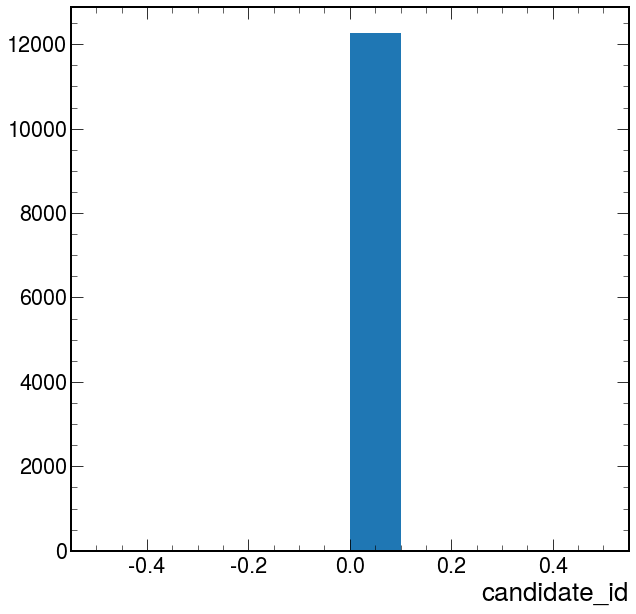

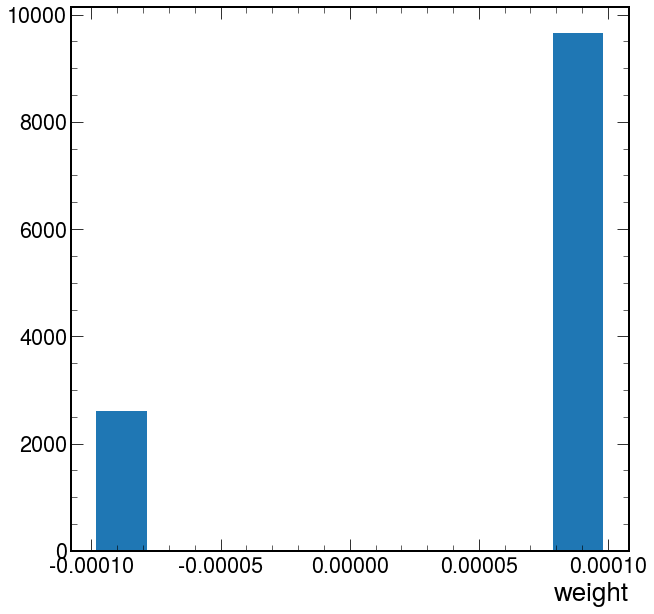

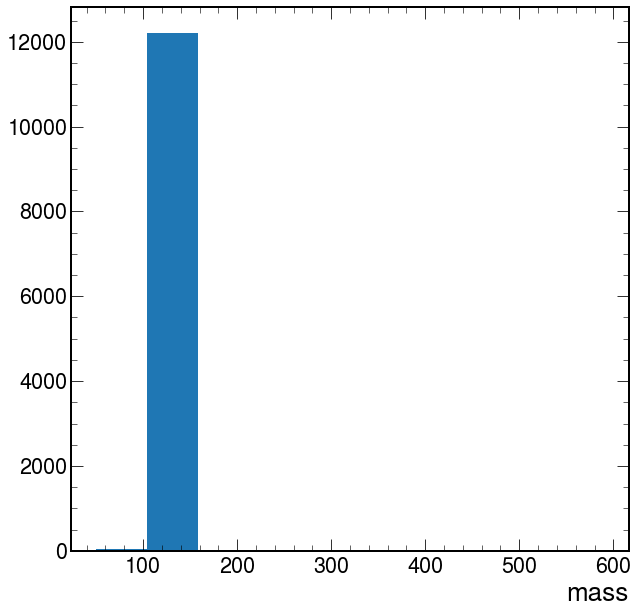

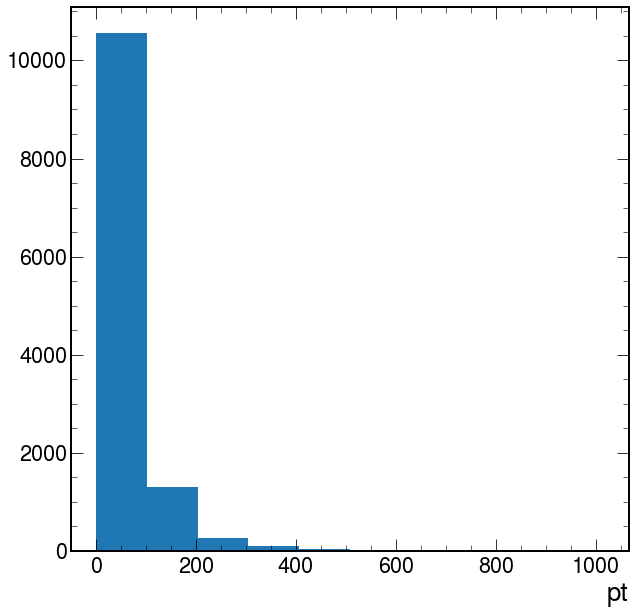

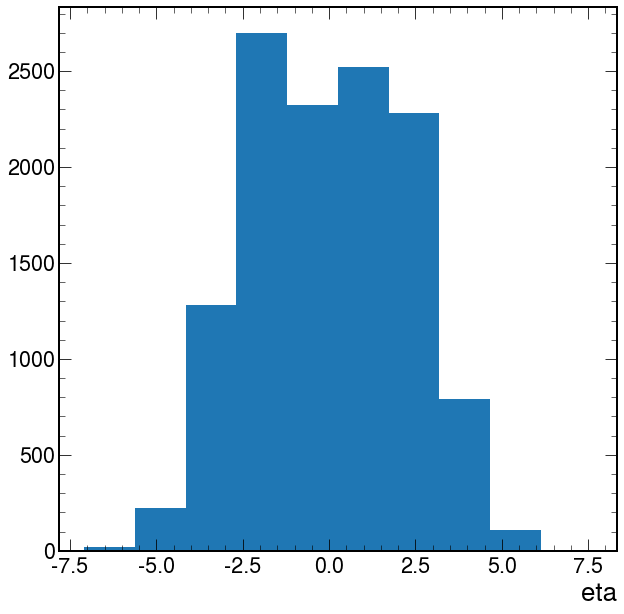

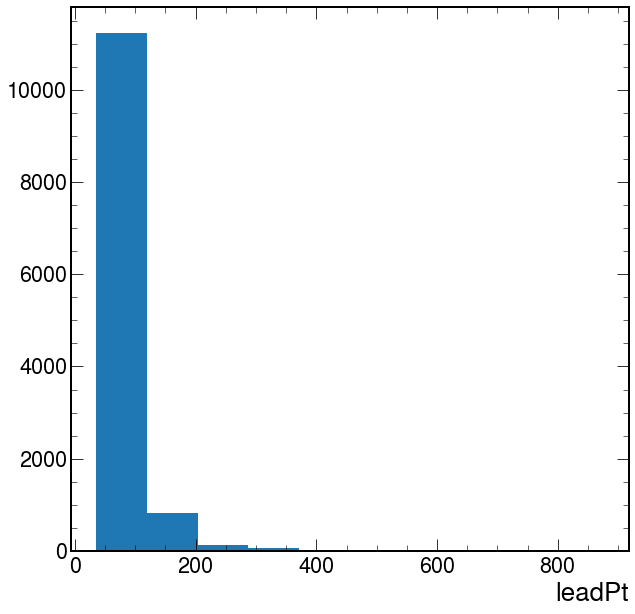

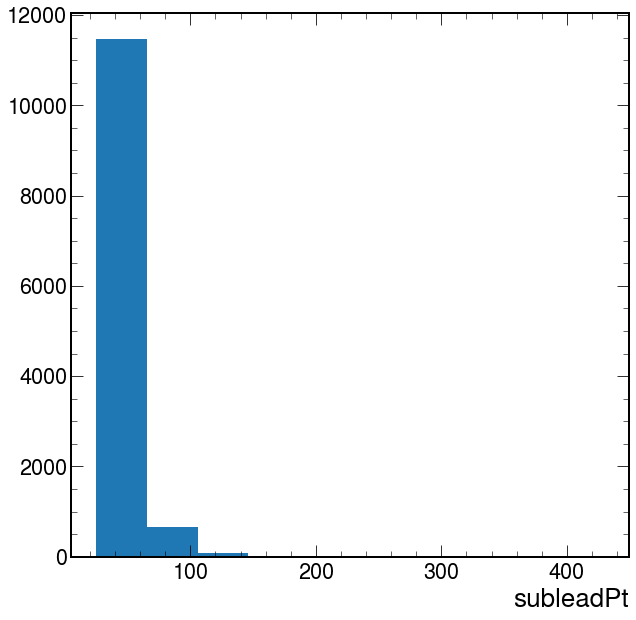

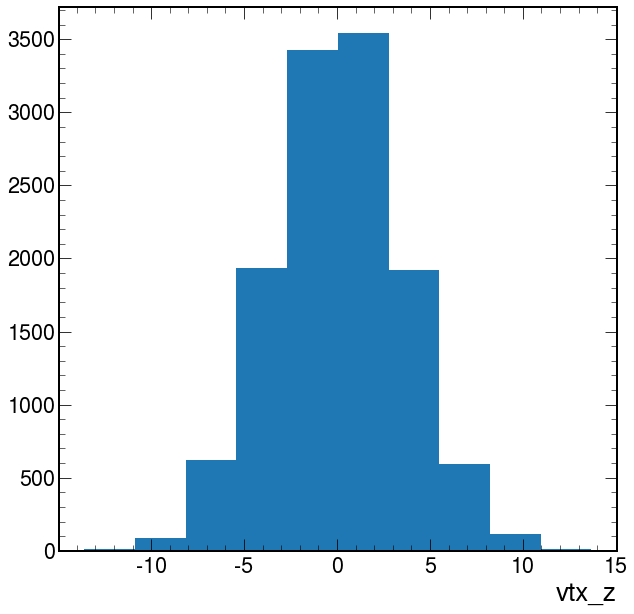

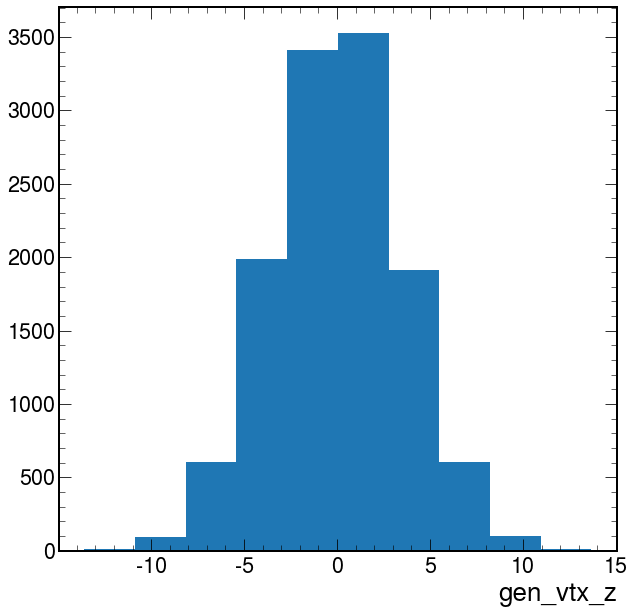

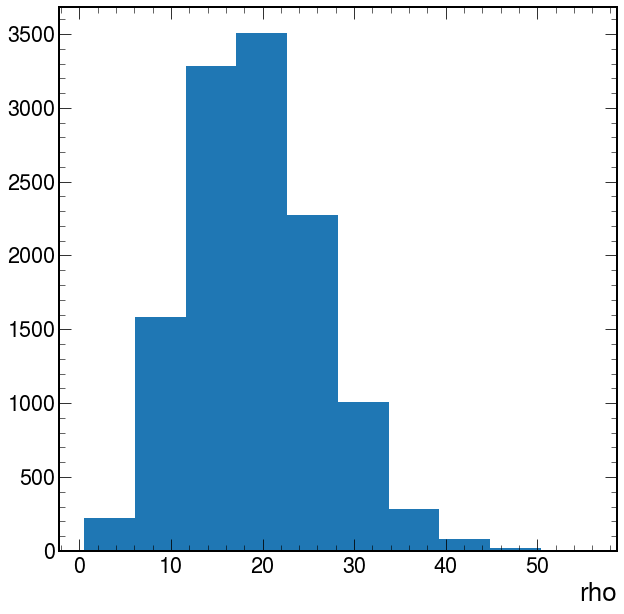

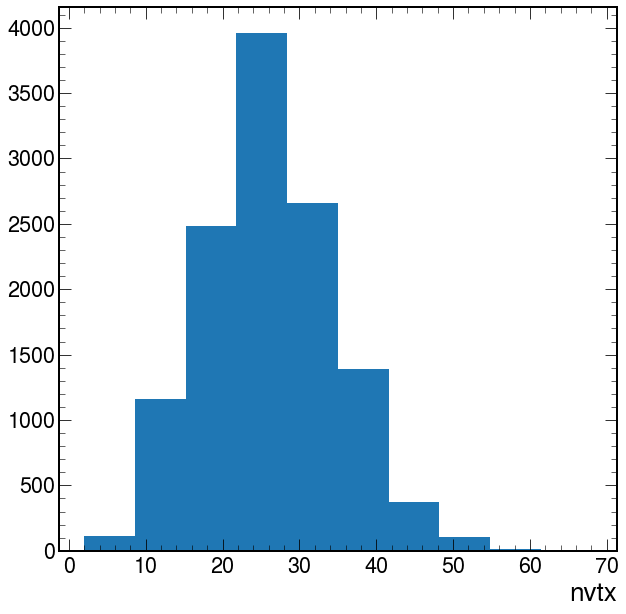

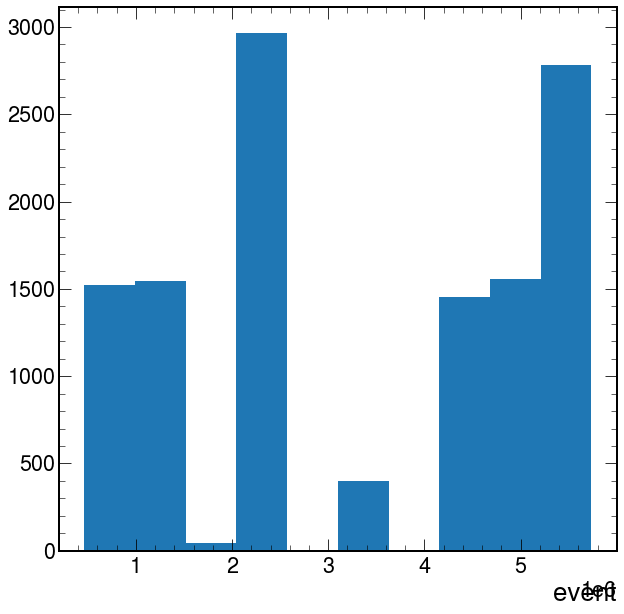

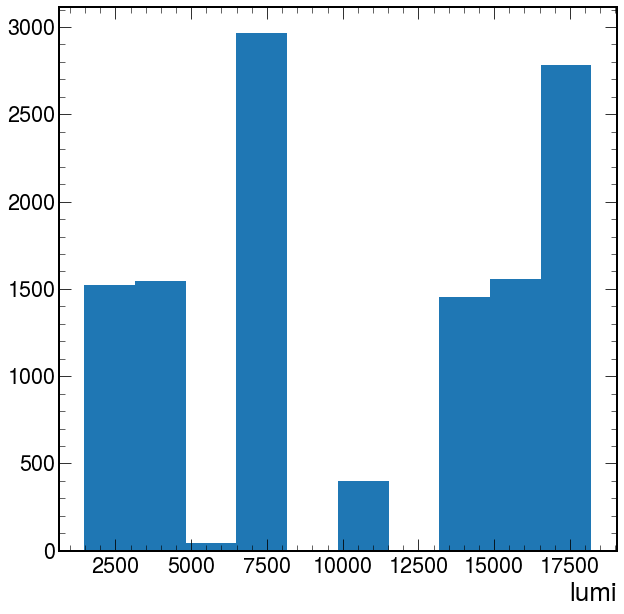

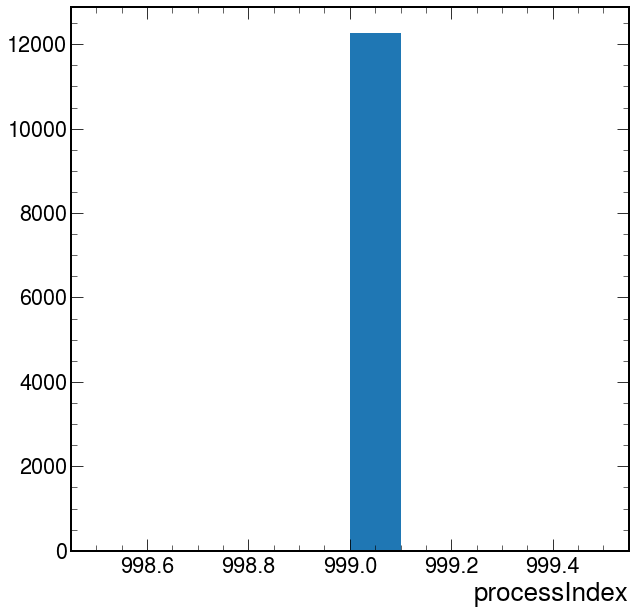

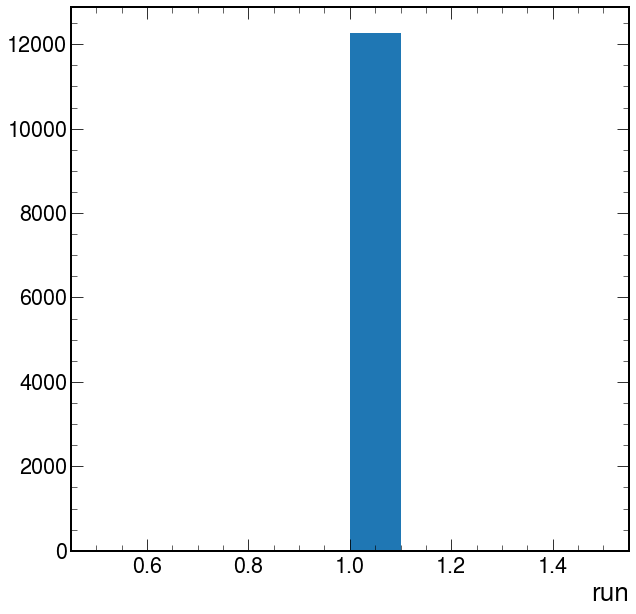

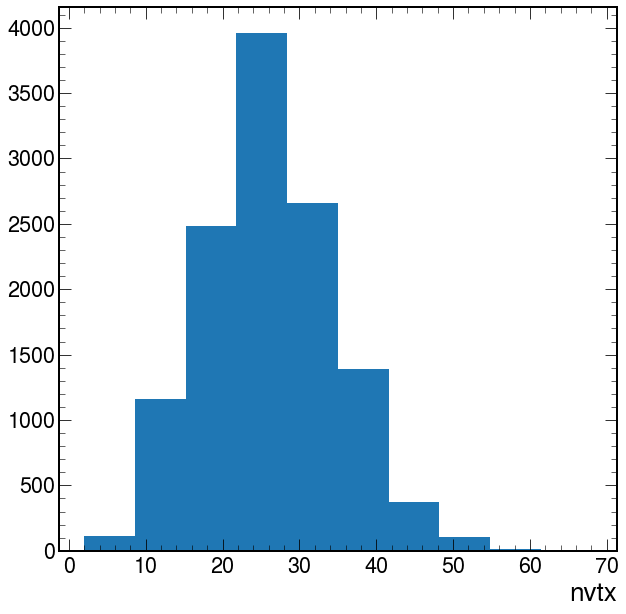

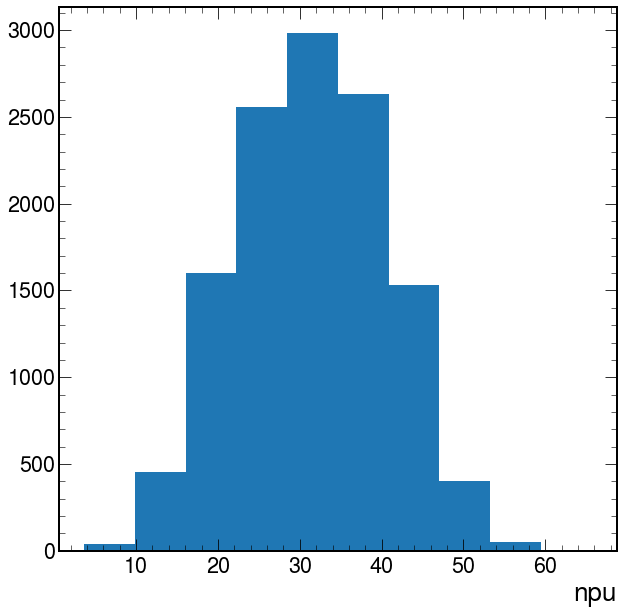

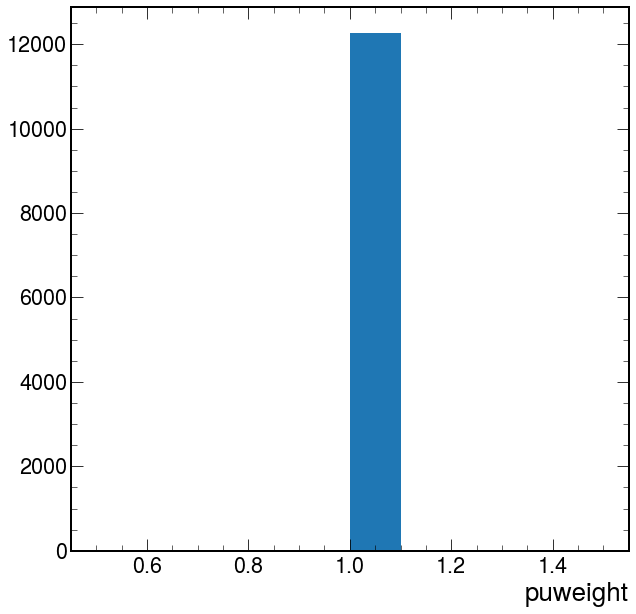

In [5]:
# Quickly plot one of the two samples to get optimal ranges

f = uproot.open("/work/gallim/root_files/vertex_investigation/VertexInvestigation/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8_storeWeights_alesauva-UL2018_0-10_6_4-v0-RunIISummer19UL18MiniAOD-106X_upgrade2018_realistic_v11_L1v1-v1-3f96409841a3cc85b911eb441562baae_USER_9.root")
t = f["diphotonDumper/trees/ggH_125_13TeV_All_$SYST"]
evts = t.arrays(variables)

for var in variables:
    fig, ax = plt.subplots()
    plt.hist(evts[var].to_numpy())
    ax.set_xlabel(var)
    plt.show()

In [ ]:
histo = hist.Hist("Counts",
                  hist.Cat("vertex", "Vertex"),
                  *[hist.Bin(sp, "${}$".format(sp), specs[sp]["bins"], *specs[sp]["range"]) for sp in specs]
                 )

In [ ]:
%%time

for batch in uproot.iterate(["{}:{}".format(v_custom_file, tree_name)], expressions=variables + ["weight"], library="np"):
    histo.fill(vertex="Vertex Reco", **batch)
    
for batch in uproot.iterate(["{}:{}".format(v0_file, tree_name)], expressions=variables + ["weight"], library="np"):
    histo.fill(vertex="Vertex 0th", **batch)

In [ ]:
for var in variables:
    varss = variables.copy()
    varss.remove(var)
    fig, ax = plt.subplots()
    hist.plot1d(histo.sum(*varss))
    plt.show();